# Data processing

In [6]:
%matplotlib inline
import numpy as np

In [2]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    like=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of cha

In [12]:
import scipy

In [13]:
from scipy import interpolate

In [5]:
t = np.linspace(0, 1, 20)

In [6]:
signal = np.sin(2 * np.pi* t) + 0.05 * np.random.randn(len(t))

In [11]:
import matplotlib.pyplot as plt

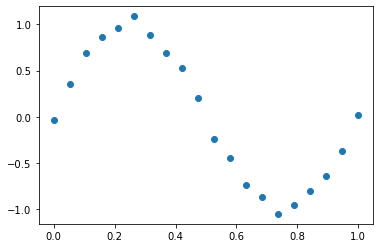

In [8]:
plt.plot(t, signal, 'o')

In [9]:
interpolate.interp1d?

Init signature:
interpolate.interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zer

In [10]:
interpolator = interpolate.interp1d(t, signal, kind='cubic')

In [11]:
type(interpolator)

scipy.interpolate.interpolate.interp1d

In [12]:
t_refine = np.linspace(0, 1, 100)

In [13]:
signal_refine = interpolator(t_refine)

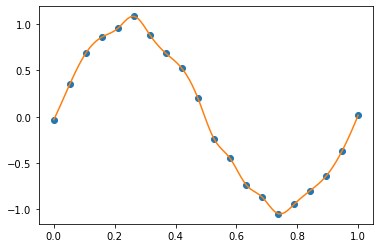

In [14]:
plt.plot(t, signal, 'o')
plt.plot(t_refine, signal_refine)

In [15]:
type(signal_refine)

numpy.ndarray

In [16]:
signal_refine[:5] = 0

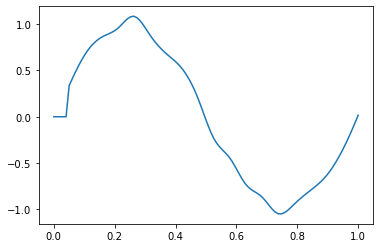

In [17]:
plt.plot(t_refine, signal_refine)

## Image processing

In [15]:
im = np.random.random((10, 10))

In [16]:
print(im)

[[0.11456017 0.71181247 0.21888943 0.68421451 0.41134412 0.28237672
  0.41966886 0.87264796 0.8681244  0.90951808]
 [0.61131842 0.03295355 0.41788754 0.36676186 0.40929318 0.67254823
  0.22637659 0.44321309 0.4812585  0.63589075]
 [0.0531242  0.51777888 0.26075515 0.06027882 0.81084215 0.67827447
  0.11938201 0.0242243  0.09257221 0.61060062]
 [0.06848923 0.70186269 0.20461647 0.212513   0.05076061 0.2694275
  0.8875836  0.4314631  0.10138232 0.27521291]
 [0.02815791 0.49765166 0.85771599 0.60765205 0.4389365  0.84912754
  0.15329904 0.37337406 0.45946772 0.37985618]
 [0.71705375 0.80520045 0.06018251 0.14408716 0.86790648 0.21067198
  0.9885608  0.60890632 0.81477824 0.69994796]
 [0.74912364 0.90822209 0.22138962 0.04679471 0.45355971 0.26842388
  0.49304509 0.87731952 0.74135246 0.79089116]
 [0.32639185 0.35416083 0.47316241 0.74031689 0.9623829  0.80018863
  0.70465691 0.68525413 0.64977052 0.03854276]
 [0.15944226 0.25178327 0.27279081 0.05076203 0.89264059 0.63830399
  0.24971692 

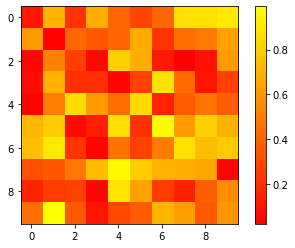

In [17]:
plt.imshow(im, cmap='autumn', interpolation='nearest'); plt.colorbar()

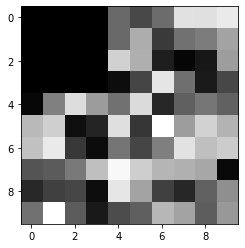

In [18]:
im[:4, :4] = 0
plt.imshow(im, cmap='gray', interpolation='nearest')

In [19]:
from scipy import ndimage

In [20]:
import skimage

In [21]:
im.dtype

dtype('float64')

In [22]:
im2 = im * 255

In [23]:
im3 = im2.astype(np.uint8)

In [24]:
im3.dtype

dtype('uint8')

In [25]:
ls

100_Basics.ipynb   300_numpy.ipynb           data_processing.ipynb
200_Modules.ipynb  400_basic_plotting.ipynb  good_practices.ipynb


In [26]:
from skimage import io

In [27]:
im = io.imread('../data_example/Al4-@950-16h30-01.TIF')

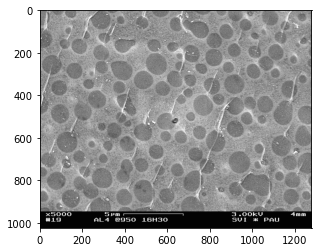

In [28]:
plt.imshow(im); plt.gray()

In [29]:
im.shape

(1024, 1280)

In [30]:
from skimage import data

In [31]:
chelsea = data.chelsea()

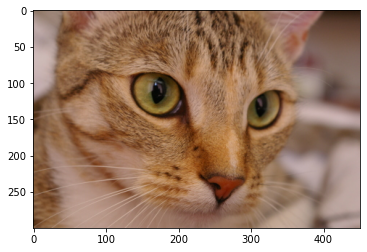

In [32]:
plt.imshow(chelsea)

In [33]:
chelsea.shape

(300, 451, 3)

In [34]:
chelsea[0, 0]

array([143, 120, 104], dtype=uint8)

In [35]:
chelsea[:100, :100, 1:] = 0

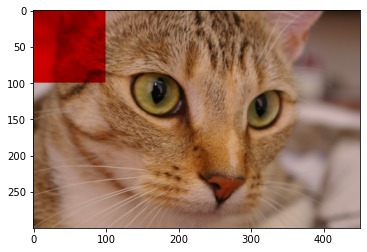

In [36]:
plt.imshow(chelsea)

In [37]:
chelsea[:10, :10, 0]

array([[143, 143, 141, 141, 141, 141, 141, 143, 144, 145],
       [146, 145, 143, 142, 142, 142, 142, 142, 144, 145],
       [148, 147, 146, 145, 145, 144, 143, 143, 144, 146],
       [151, 149, 147, 147, 146, 145, 145, 145, 144, 145],
       [153, 151, 150, 149, 148, 147, 147, 147, 147, 146],
       [156, 154, 152, 152, 151, 149, 148, 147, 149, 148],
       [160, 157, 156, 156, 154, 152, 151, 150, 149, 148],
       [163, 160, 160, 159, 156, 154, 154, 153, 151, 152],
       [163, 160, 161, 161, 159, 157, 155, 154, 154, 153],
       [166, 165, 166, 165, 162, 160, 158, 158, 156, 155]], dtype=uint8)

In [38]:
chelsea[:100, :100, 0] = 255

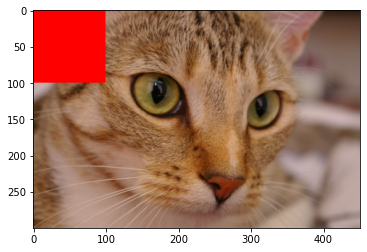

In [39]:
plt.imshow(chelsea)

In [40]:
from skimage import color

In [41]:
grey_cat = color.rgb2grey(chelsea)

<ipython-input-41-d4a864a99711>:1: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey_cat = color.rgb2grey(chelsea)


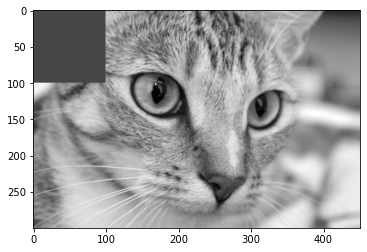

In [42]:
plt.imshow(grey_cat)

In [43]:
camera = data.camera()

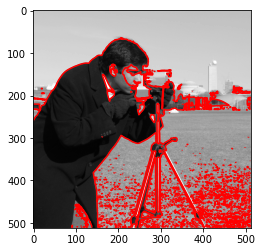

In [44]:
plt.imshow(camera)
plt.contour(camera, [128], colors='r')

In [45]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [46]:
from skimage import exposure

In [47]:
hi = exposure.histogram(camera)
print(hi)

(array([   1,    1,   20,  608, 2680, 2944, 2217, 1299,  966,  878,  782,
        697,  731,  696,  717,  747,  735,  870, 1064, 1208, 1378, 1723,
       2129, 2826, 3500, 3951, 4627, 4957, 4825, 4366, 3501, 2618, 2082,
       1672, 1376, 1076,  951,  726,  686,  602,  499,  489,  431,  454,
        454,  447,  418,  419,  414,  382,  313,  327,  314,  288,  299,
        267,  299,  283,  250,  230,  239,  217,  203,  201,  208,  174,
        220,  178,  183,  169,  167,  149,  184,  159,  170,  180,  155,
        159,  159,  153,  153,  136,  155,  169,  155,  153,  158,  156,
        134,  162,  150,  170,  156,  148,  174,  141,  173,  170,  186,
        213,  196,  214,  201,  223,  196,  218,  210,  202,  237,  247,
        233,  262,  286,  287,  302,  330,  408,  369,  400,  461,  469,
        471,  548,  485,  603,  610,  663,  705,  700,  792,  906,  877,
        978,  973, 1038, 1126, 1168, 1224, 1265, 1345, 1417, 1584, 1608,
       1730, 1842, 2069, 2074, 2159, 2143, 2197, 2

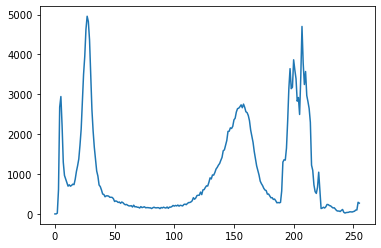

In [48]:
plt.plot(hi[1], hi[0])

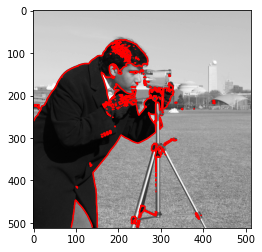

In [49]:
plt.imshow(camera)
plt.contour(camera, [50], colors='r')

In [50]:
from skimage import filters

In [51]:
val = filters.threshold_otsu(camera);print(val)

102


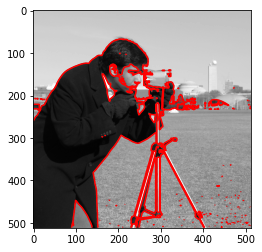

In [52]:
plt.imshow(camera)
plt.contour(camera, [val], colors='r')

In [53]:
mask = camera < val

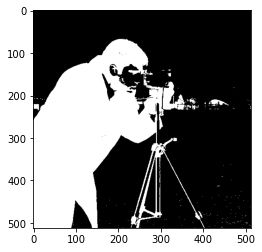

In [54]:
plt.imshow(mask)

In [57]:
binary = data.binary_blobs().astype(float)

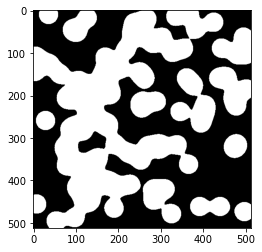

In [58]:
plt.imshow(binary)

In [59]:
binary += 0.4 * np.random.randn(*binary.shape)

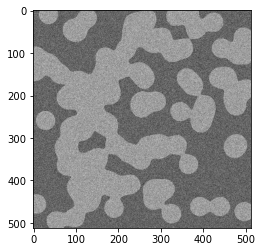

In [60]:
plt.imshow(binary)

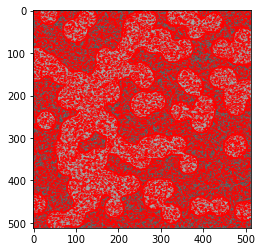

In [61]:
plt.imshow(binary)
plt.contour(binary, [0.5], colors='r')

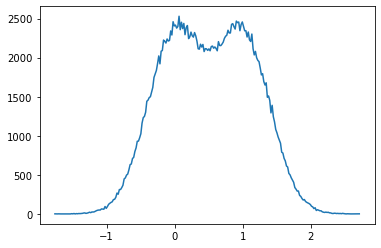

In [62]:
hi = exposure.histogram(binary)
plt.plot(hi[1], hi[0])

In [63]:
binary=binary/3.;binary_denoised = filters.median(binary, np.ones((5, 5)))

In [65]:
print(binary.max())
binary = exposure.rescale_intensity(binary)
print(binary.max())

1.0
1.0


In [66]:
binary_denoised = filters.median(binary, np.ones((3, 3)))

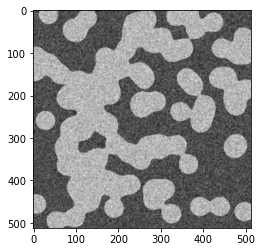

In [67]:
plt.imshow(binary_denoised)

In [68]:
binary_denoised = filters.gaussian(binary, 3)

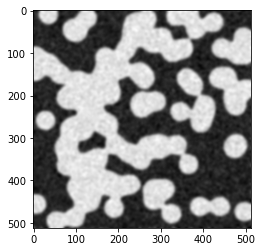

In [69]:
plt.imshow(binary_denoised)

In [70]:
hi_new = exposure.histogram(binary_denoised)

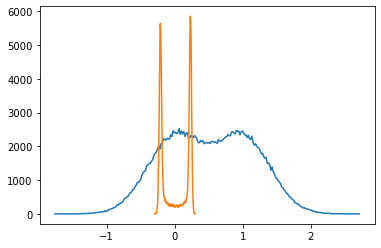

In [71]:
plt.plot(hi[1], hi[0])
plt.plot(hi_new[1], hi_new[0])